### [5 Marks] Implement Inverse CDF sampling for the Fréchet distribution. With sufficient number of samples, plot the kernel density estimation plot and show that you are able to match the PDF. Also, reproduce the following figure and visualize it:

The Fréchet distribution or the Weibull distribution(both are almost same; in Weibul Distribution, the location parameter from Fréchet distribution is generally set to zero and here we are doing calculations by setting location parameter to zero) has the following PDF :
<span style="color:blue">$$ f(x) = \frac{\beta}{\alpha}*(\frac{x}{\alpha})^{\beta-1}*e^{-(\frac{x}{\alpha})^{\beta}} $$</span>
where $\beta$ is "shape" parameter and $\alpha$  is "scale" parameter
<br></br>
For Fréchet distribution, CDF is as follows :
<span style="color:blue"> 
    $$F(x)=\begin{equation}
\left\{ 
  \begin{aligned}
     1-e^{-(\frac{x}{\alpha})^{\beta}} & \text{; for } x > 0\\    
     0  & \text{ ; otherwise }\\ 
  \end{aligned}
  \right.
\end{equation}
$$ </span>
<br></br>

And so the inverse CDF for Fréchet distribution is : 
<span style="color:blue"> $$F^{-1}(x) = \alpha*\lbrace -ln(1-x)\rbrace^{\frac{1}{\beta}}$$ </span>

###### (The derivation of above functions are given in the last cell)

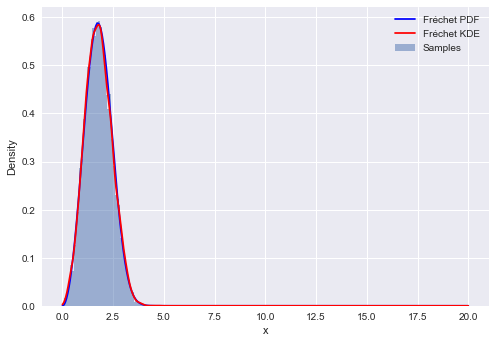

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Define the inverse CDF function for the Weibull distribution
def weibull_icdf(u, alpha, beta):
    return alpha * (-np.log(1 - u))**(1/beta)

# Set the shape and scale parameters of the Weibull distribution
alpha = 2
beta = 3

# Generate 10,000 random numbers using inverse CDF sampling
num_samples = 10000

#to generate same uniform random numbers from 0 to 1 agian and again
np.random.seed(23)
u = np.random.uniform(size=num_samples)

samples = inverse_cdf_Fréchet(u, alpha, beta)

# Generate the PDF plot of the Weibull distribution
x = np.linspace(0, 20, 1000)
pdf = (beta/alpha) * (x/alpha)**(beta-1) * np.exp(-(x/alpha)**beta)

# Generate the kernel density estimation plot of the generated samples
kde = gaussian_kde(samples)
kde_x = np.linspace(0, 20, 1000)
kde_y = kde(kde_x)

# Plot the histogram, PDF plot, and KDE plot of the generated samples
plt.style.use("seaborn")
plt.hist(samples, bins=50, density=True, alpha=0.5, label="Samples")
plt.plot(x, pdf, label="Fréchet PDF",color="blue")
plt.plot(kde_x, kde_y, label="Fréchet KDE",color="red")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.show()


Here, we can see that the with the 10,000 samples, the kernel desnity estimation plot matches perfectly with the PDF.